<a href="https://colab.research.google.com/github/psrajput1432/High-School-Exam-Score-Prediction/blob/main/ExamScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import Libraries

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load and Explore Data

In [21]:
#load data
df_train = pd.read_csv("/content/drive/MyDrive/DataScienceHakathon/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/DataScienceHakathon/test.csv")

#Check for null or missing value(s)
print("Missing values present in Train data")
print(df_train.isnull().sum())
print("missing values present in Test data")
print(df_test.isnull().sum())

Missing values present in Train data
Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64
missing values present in Test data
Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
dtype: int64


In [31]:
# Print column names for both train and test datasets
print("Train columns:", df_train.columns)
print("Test columns:", df_test.columns)

Train columns: Index(['Roll no', 'test preparation ', 'gender', 'parents_education', 'lunch',
       'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')
Test columns: Index(['Roll no', 'test preparation ', 'gender', 'parents_education', 'lunch',
       'Section', 'practical score', 'viva score'],
      dtype='object')


# Rename Columns

In [32]:
#Rename columns
df_train.rename(columns={'gender':'gender', 'parental level of education':'parents_education', 'test preparation':'testprep'}, inplace=True)
df_test.rename(columns={'gender':'gender', 'parental level of education':'parents_education', 'test preparation':'testprep'}, inplace=True)
df_train.head()
df_test.head()

,Roll no,test preparation,gender,parents_education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62


In [34]:
# Ensure the column names are consistent
df_train.rename(columns={'gender': 'gender',
                         'parental level of education': 'parents_education',
                         'test preparation ': 'testprep'}, inplace=True)

df_test.rename(columns={'gender': 'gender',
                        'parental level of education': 'parents_education',
                        'test preparation ': 'testprep'}, inplace=True)

# Explore Categorical Columns



In [35]:
#list of categorical columns
categorical_colums = ['gender', 'parents_education', 'lunch', 'Section', 'testprep']

#print unique values for each categorical column
for column in categorical_colums:
    unique_values = df_train[column].unique()
    print(f"Unique values in '{column}':{unique_values}")

Unique values in 'gender':['male' 'female']
Unique values in 'parents_education':['some college' "master's degree" 'high school' "associate's degree"
 'some high school' "bachelor's degree"]
Unique values in 'lunch':['standard' 'free/reduced']
Unique values in 'Section':['Section A' 'Section C' 'Section E' 'Section D' 'Section B']
Unique values in 'testprep':['none' 'completed']


# Data Preprocessing

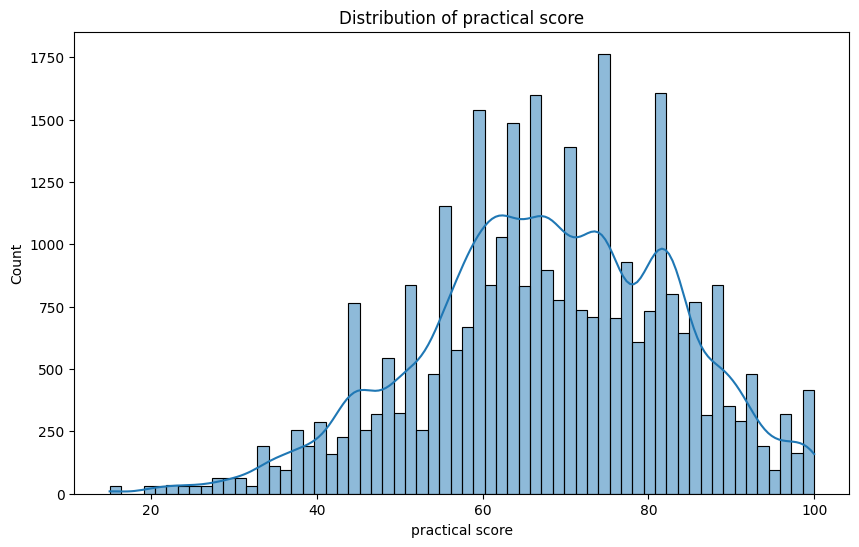

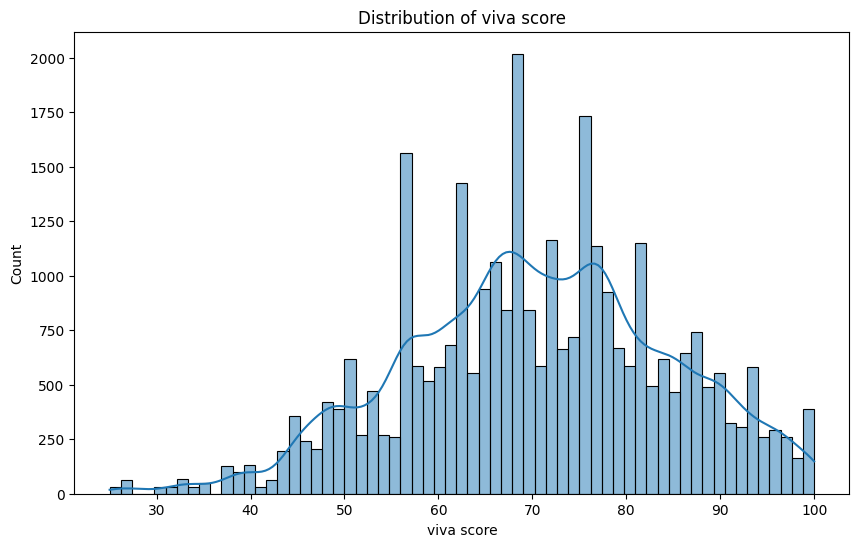

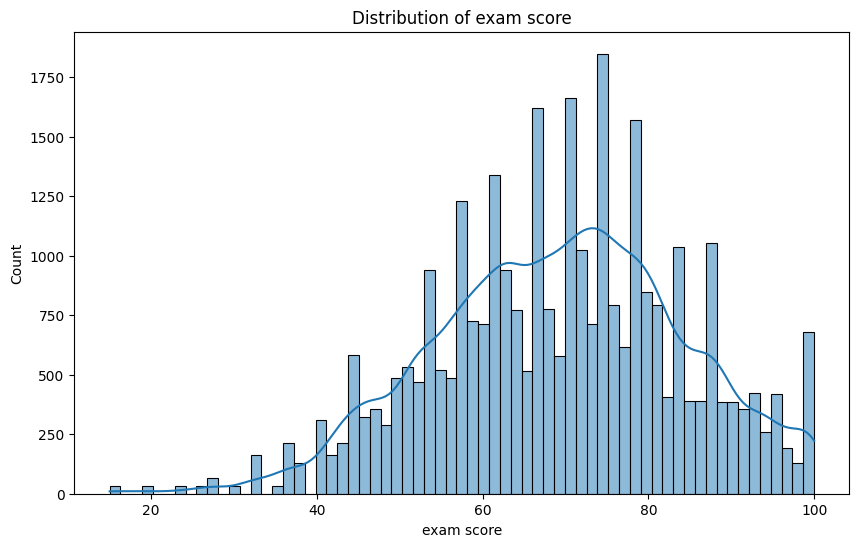

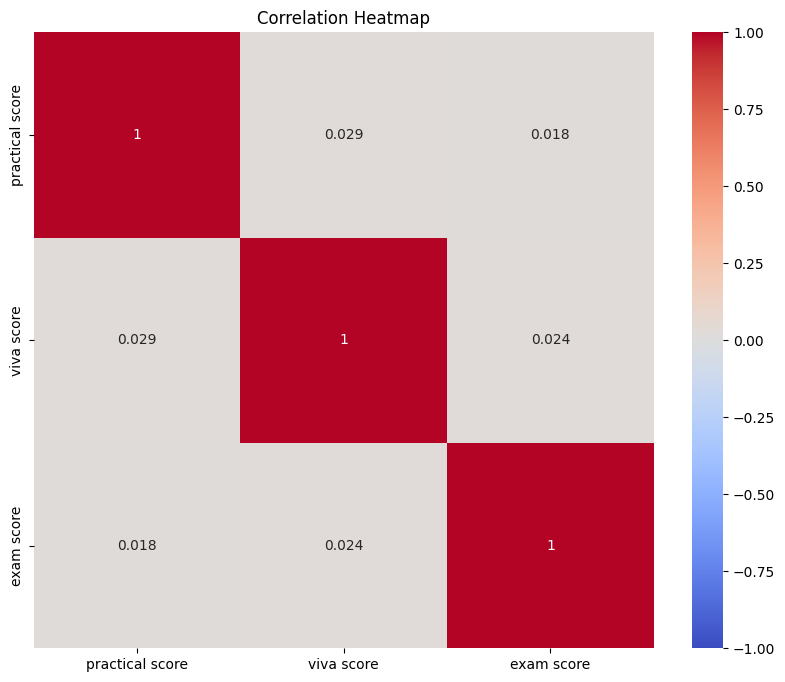

In [40]:
# Drop 'Roll no' column
train_data = df_train.drop('Roll no', axis=1)
test_data = df_test.drop('Roll no', axis=1)

# One-hot encode categorical columns
for col in categorical_columns:
    if col in train_data.columns:
        train_data = pd.get_dummies(data=train_data, columns=[col], drop_first=True, dtype=int)
    if col in test_data.columns:
        test_data = pd.get_dummies(data=test_data, columns=[col], drop_first=True, dtype=int)

#Distribute plot for numerical columns
numerical_columns = ['practical score', 'viva score', 'exam score']
for column in numerical_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(train_data[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()

#Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Separate features and target

In [41]:
#Seperate features and targets
x = train_data.drop('exam score', axis=1)
y = train_data['exam score']

#test features
x_test = test_data

# Train-Test Split and Scaling

In [43]:
#split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

#standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Define and Evaluate Models

In [44]:
#define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

#Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Cross-Validation Mean Squared Error: {-scores.mean()}")

Linear Regression Cross-Validation Mean Squared Error: 226.12690330130644
Decision Tree Cross-Validation Mean Squared Error: 472.7543397857833
Random Forest Cross-Validation Mean Squared Error: 257.61174199852655
Gradient Boosting Cross-Validation Mean Squared Error: 227.36293847172496
XGBoost Cross-Validation Mean Squared Error: 242.30074944640978
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 25599, number of used features: 14
[LightGBM] [Info] Start training from score 69.140005
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

# Validate Models and Select the best one

In [47]:
# Validate models
validation_results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    validation_results[name] = rmse_val
    print(f'{name} Validation RMSE: {rmse_val}')

# Compare results and select the best model
best_model_name = min(validation_results, key=validation_results.get)
best_model = models[best_model_name]
print(f'Best model based on validation RMSE: {best_model_name} with RMSE: {validation_results[best_model_name]}')

Linear Regression Validation RMSE: 14.863942038274216
Decision Tree Validation RMSE: 20.857892009289447
Random Forest Validation RMSE: 15.464208358696053
Gradient Boosting Validation RMSE: 14.856554810744923
XGBoost Validation RMSE: 15.134822549083845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 25599, number of used features: 14
[LightGBM] [Info] Start training from score 69.117309
LightGBM Validation RMSE: 14.881994004056827
SVR Validation RMSE: 14.925150280680203
Best model based on validation RMSE: Gradient Boosting with RMSE: 14.856554810744923


# Hyperparameter Tuning for the best model

In [50]:
# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


# Train the best model on the entire training set

In [52]:
best_model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
                          n_estimators=200, random_state=42)

# Model Evaluation and Enterpretation

Tuned Gradient Boosting: MSE=220.71542881733237, RMSE=14.856494499623132, MAE=12.049230006991866, R2=0.002041984207675873


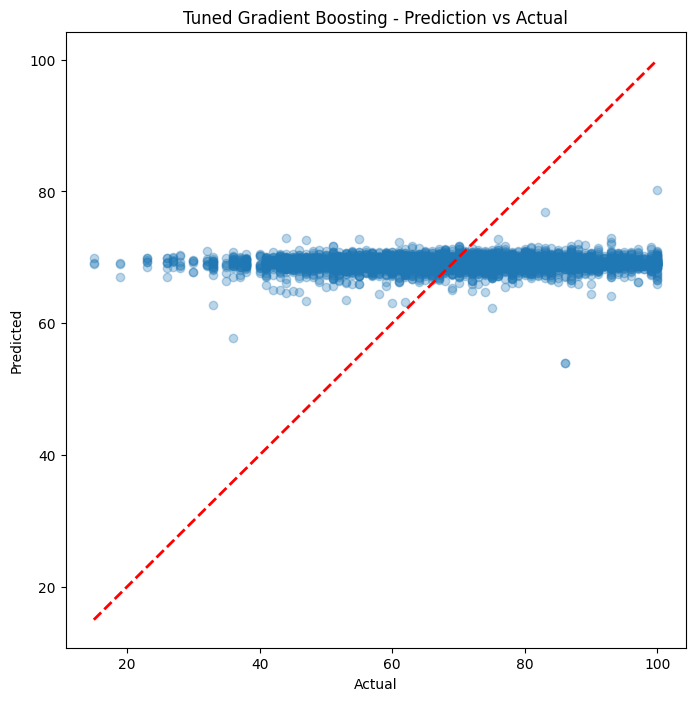

In [53]:
# Predict on the validation set
y_val_pred = best_model.predict(x_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Tuned Gradient Boosting: MSE={mse}, RMSE={rmse}, MAE={mae}, R2={r2}')

# Plot prediction vs actual
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_val_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Gradient Boosting - Prediction vs Actual')
plt.show()

# Detailed Data Analysis and Visualization

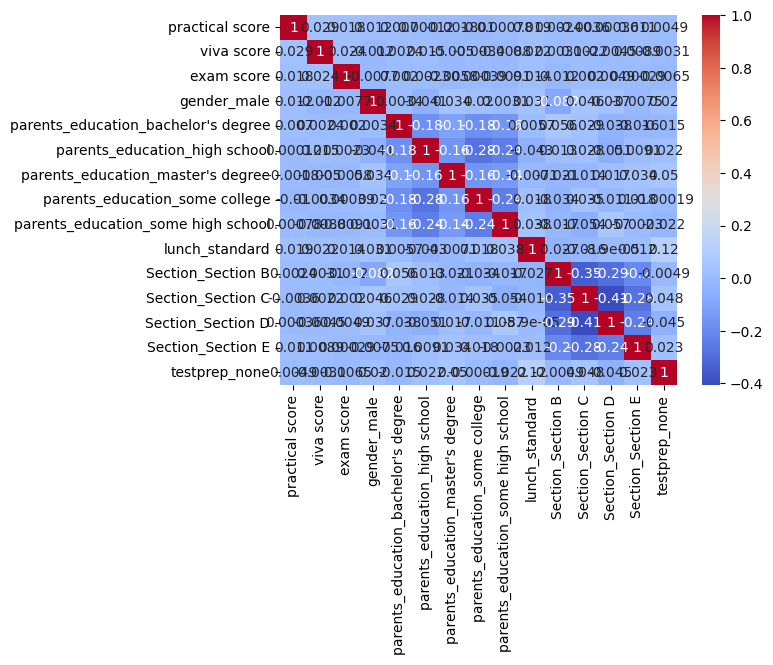

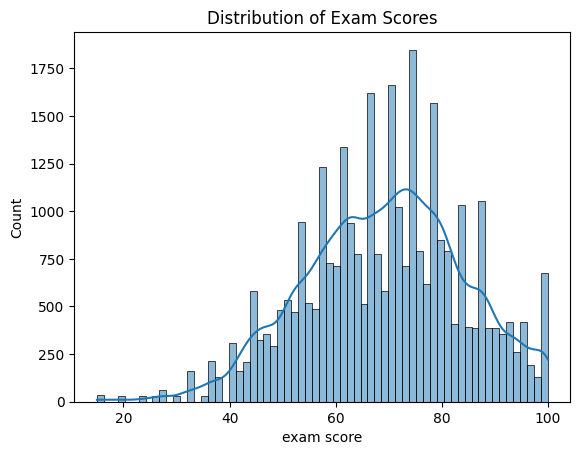

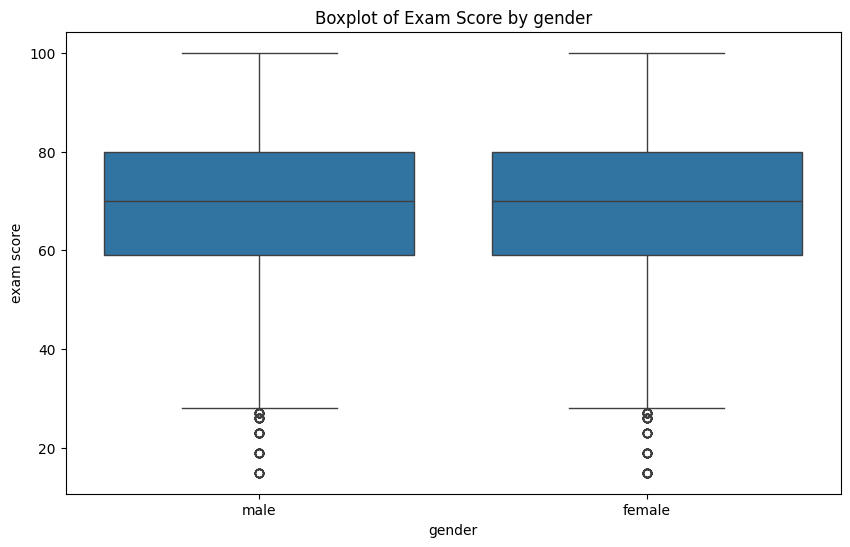

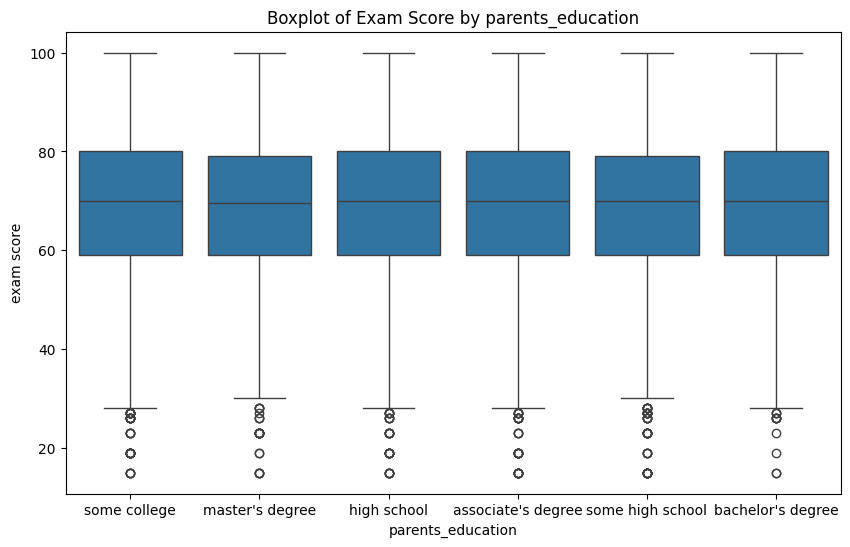

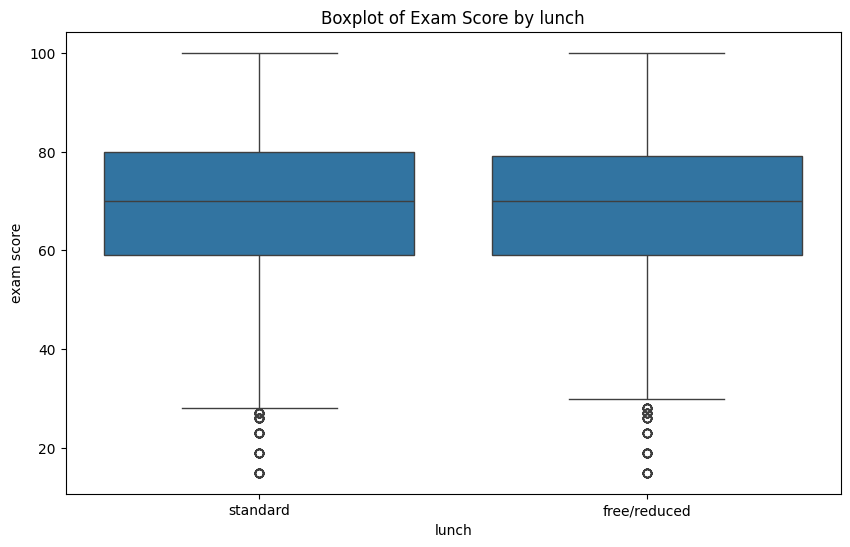

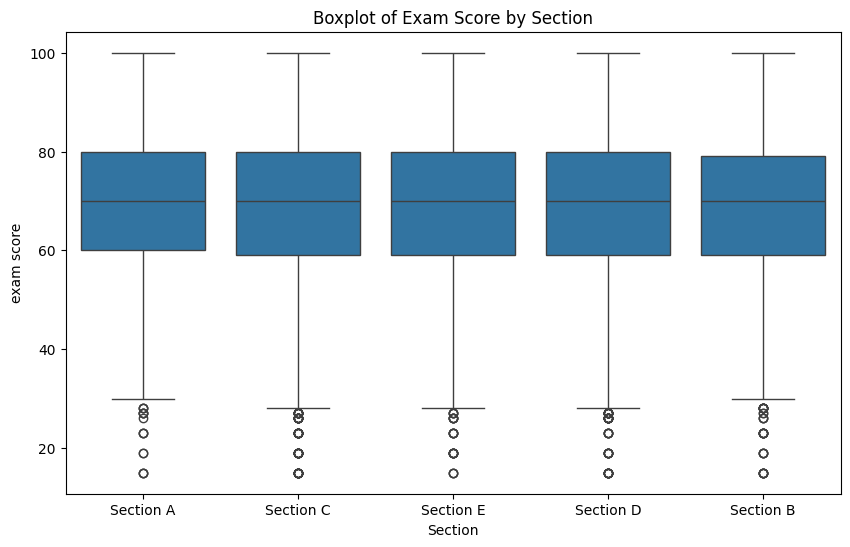

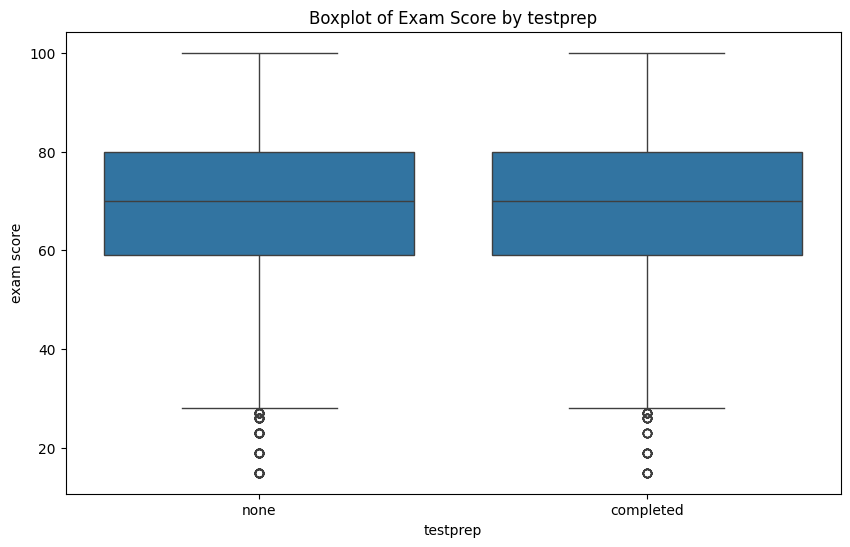

In [55]:
# Correlation matrix
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Distribution of exam scores
sns.histplot(train_data['exam score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

# Boxplot for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='exam score', data=df_train)
    plt.title(f'Boxplot of Exam Score by {column}')
    plt.show()

# Make predictions on the test data

In [57]:
# Predict on test set
test_predictions = best_model.predict(x_test)

# Prepare the submission file
submission_csv = pd.read_csv("/content/drive/MyDrive/DataScienceHakathon/sample submission.csv")
submission_csv['Exam score'] = test_predictions
submission_csv.to_csv('submission.csv', index=False)

# Validation Results Visualization

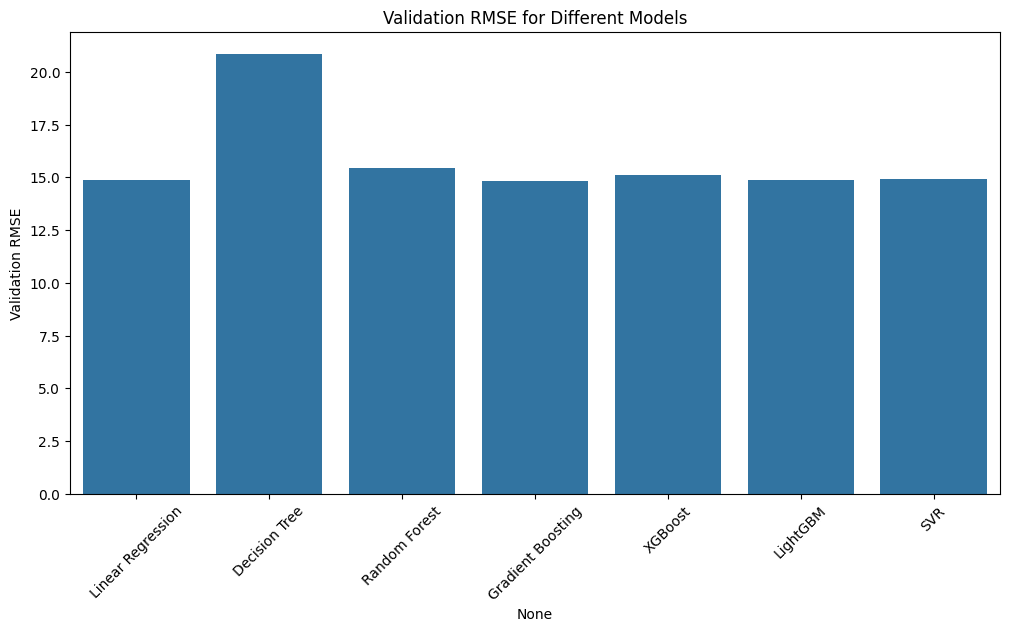

In [58]:
# Validation results visualization
validation_results_df = pd.DataFrame.from_dict(validation_results, orient='index', columns=['Validation RMSE'])
plt.figure(figsize=(12, 6))
sns.barplot(x=validation_results_df.index, y='Validation RMSE', data=validation_results_df)
plt.xticks(rotation=45)
plt.title('Validation RMSE for Different Models')
plt.show()